Quick implementation of PCA

In [199]:
import numpy as np 
import tensorflow as tf
import scipy as sc
from matplotlib import pyplot as plt
%matplotlib inline


mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
labels = np.append(y_train, y_test)
data = np.vstack([x_train, x_test]).reshape((70000, 28*28))[(labels == 4) | (labels == 9)]
sample_mean = data.sum(axis = 0)/data.shape[0]
sample_cov1 = (1/data.shape[0])*(data - sample_mean).T@(data - sample_mean)
# sample_cov2 = np.cov(data.T, bias = 1)*(data.shape[0] - 1)
eigenval, eigenvec = sc.linalg.eigh(sample_cov1)

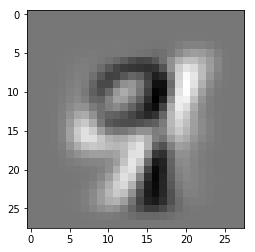

In [200]:
inds = np.array(range(784))[::-1]
eigenval = eigenval[::-1]
top_2_princip = eigenvec.T[inds].T[:, :2]
pc1 = top_2_princip[:, 1].reshape(28, 28)
plt.imshow(pc1, cmap = 'gray')

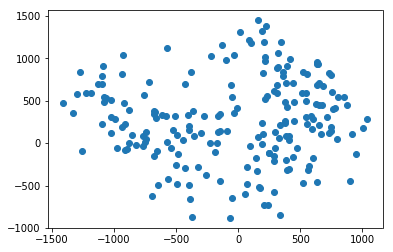

In [201]:
data_tranf = data @ top_2_princip
subset = np.random.choice(range(13782), size = 200)
data_tranf = data_tranf[subset]
plt.scatter(data_tranf[:, 0], data_tranf[:, 1])

In [ ]:
\